In [ ]:
pip install tensorflow

In [ ]:
pip install keras

In [ ]:
pip install opencv-python

In [ ]:
import os

import copy
import warnings
warnings.filterwarnings('ignore')

import cv2
import keras
from keras import backend as K
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, Input
from keras.layers import Conv2D, Activation, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical

#from keras.applications import preprocess_input
import matplotlib
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
#import shap
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import os
import numpy as np
from keras.applications.resnet50 import preprocess_input

W = 224
H = 224

label_to_class = {
    'french_fries': 0,
    'fried_rice': 1,
    'nachos': 2,
    'salad': 3,
    'sphagetti': 4
}

def get_images(dir_name=r'/content/drive/MyDrive/Classify Culinary items using Deep Learning/Dataset', label_to_class=label_to_class):
    """read images / labels from directory"""

    Images = []
    Classes = []

    for label_name in os.listdir(dir_name):
        cls = label_to_class[label_name]

        for img_name in os.listdir(os.path.join(dir_name, label_name)):
            img = load_img(os.path.join(dir_name, label_name, img_name), target_size=(W, H))
            img = img_to_array(img)

            Images.append(img)
            Classes.append(cls)

    Images = np.array(Images, dtype=np.float32)
    Classes = np.array(Classes, dtype=np.float32)
    Images, Classes = shuffle(Images, Classes, random_state=0)

    return Images, Classes

In [ ]:
Images, Classes = get_images()

Images.shape, Classes.shape

((1501, 224, 224, 3), (1501,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Images, Classes, test_size=0.2, random_state=42)

In [ ]:
y_train = to_categorical(y_train, len(label_to_class))
y_test = to_categorical(y_test, len(label_to_class))

In [ ]:
resnet_model = Sequential()

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(W, H, 3),
    pooling='avg'
)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
resnet_model.add(base_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dropout(0.35))
resnet_model.add(Dense(len(label_to_class), activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import Adam
resnet_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [16]:
history = resnet_model.fit(x_train, y_train,
                           validation_split=0.1,
                           epochs=12,
                           batch_size=32,
                           shuffle=True)

Epoch 1/15
34/34 [==============================] - 276s 8s/step - loss: 1.0386 - accuracy: 0.6009 - val_loss: 0.6785 - val_accuracy: 0.7417
Epoch 2/15
34/34 [==============================] - 258s 8s/step - loss: 0.5165 - accuracy: 0.8093 - val_loss: 0.5897 - val_accuracy: 0.8000
Epoch 3/15
34/34 [==============================] - 267s 8s/step - loss: 0.3851 - accuracy: 0.8741 - val_loss: 0.4470 - val_accuracy: 0.8417
Epoch 4/15
34/34 [==============================] - 272s 8s/step - loss: 0.3063 - accuracy: 0.8907 - val_loss: 0.4549 - val_accuracy: 0.8333
Epoch 5/15
34/34 [==============================] - 252s 7s/step - loss: 0.2850 - accuracy: 0.8991 - val_loss: 0.4711 - val_accuracy: 0.8500
Epoch 6/15
34/34 [==============================] - 265s 8s/step - loss: 0.2166 - accuracy: 0.9269 - val_loss: 0.4586 - val_accuracy: 0.8500
Epoch 7/15
34/34 [==============================] - 267s 8s/step - loss: 0.1612 - accuracy: 0.9454 - val_loss: 0.4966 - val_accuracy: 0.8417
Epoch 8/15
34

In [17]:
resnet_model.save('/content/drive/MyDrive/Classify Culinary items using Deep Learning/culinary_resnet50.h5')

In [ ]:
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Evaluate the model on the test data
loss, accuracy = resnet_model.evaluate(x_test, y_test)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

10/10 [==============================] - 75s 7s/step - loss: 0.6759 - accuracy: 0.8173
Test loss: 0.6758808493614197
Test accuracy: 0.8172757625579834


In [19]:
y_preds=resnet_model.predict(x_test)
print(y_preds)

(eval_loss,eval_accuracy)=resnet_model.evaluate(x_test,y_test,batch_size=32,verbose=1)
print("Accuracy :{:.2f}%".format(eval_accuracy*100))
print("Loss :{:.2f}%".format(eval_loss))

10/10 [==============================] - 64s 6s/step
[[9.99997318e-01 3.22382157e-08 1.67266899e-06 6.21783443e-07
  3.60119856e-07]
 [4.83214649e-07 5.90263262e-05 9.99882519e-01 5.73056677e-05
  5.83822214e-07]
 [7.42803536e-07 3.16214901e-05 4.81598042e-02 9.51806128e-01
  1.70425540e-06]
 ...
 [1.11534255e-05 1.73010776e-05 2.49850509e-05 5.63045214e-05
  9.99890208e-01]
 [4.16587398e-04 3.22256419e-05 9.99487638e-01 2.88952401e-06
  6.06796530e-05]
 [1.35336115e-04 9.49985445e-01 7.71695375e-03 2.85005802e-03
  3.93121615e-02]]
10/10 [==============================] - 60s 6s/step - loss: 0.6759 - accuracy: 0.8173
Accuracy :81.73%
Loss :0.68%


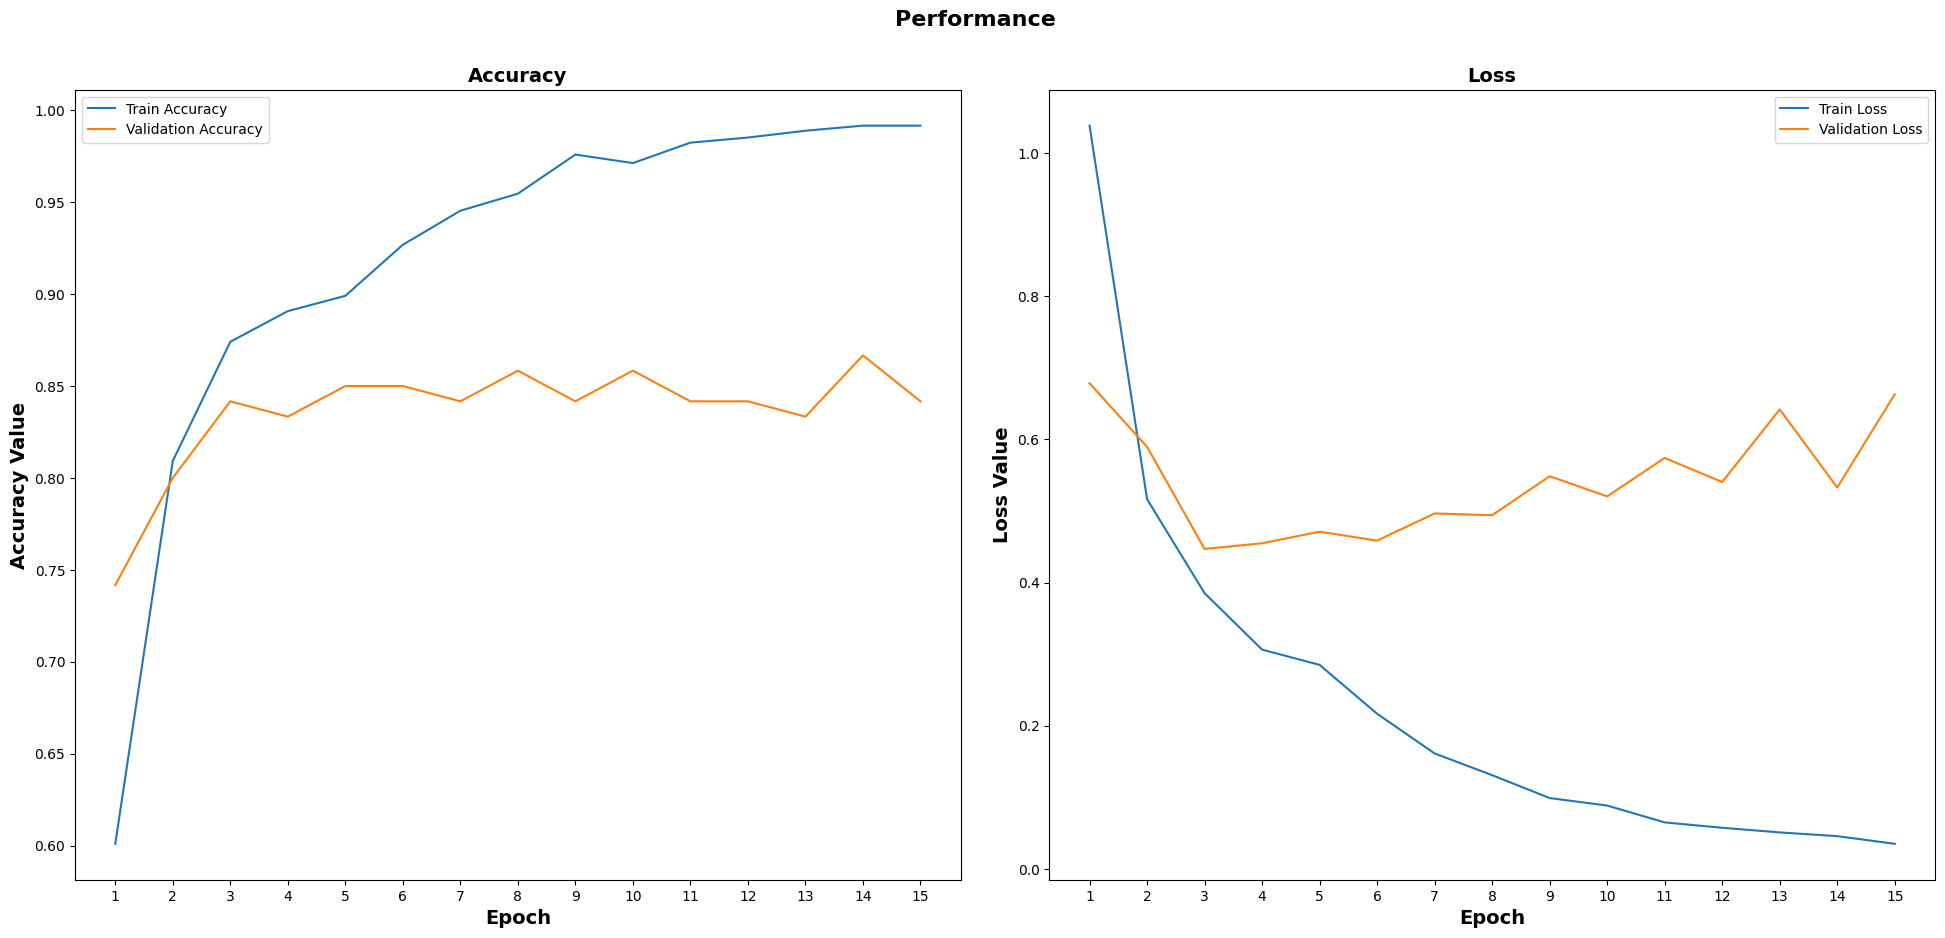

In [20]:
from sklearn.metrics import accuracy_score
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))
t = f.suptitle('Performance', fontsize=16,fontweight='bold')
f.subplots_adjust(top=0.9, wspace=0.1)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 1))
ax1.set_ylabel('Accuracy Value',fontsize=14,fontweight='bold')
ax1.set_xlabel('Epoch',fontsize=14,fontweight='bold')
ax1.set_title('Accuracy', fontsize=14,fontweight='bold')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 1))
ax2.set_ylabel('Loss Value',fontsize=14,fontweight='bold')
ax2.set_xlabel('Epoch',fontsize=14,fontweight='bold')
ax2.set_title('Loss',fontsize=14,fontweight='bold')
l2 = ax2.legend(loc="best")


10/10 [==============================] - 63s 6s/step


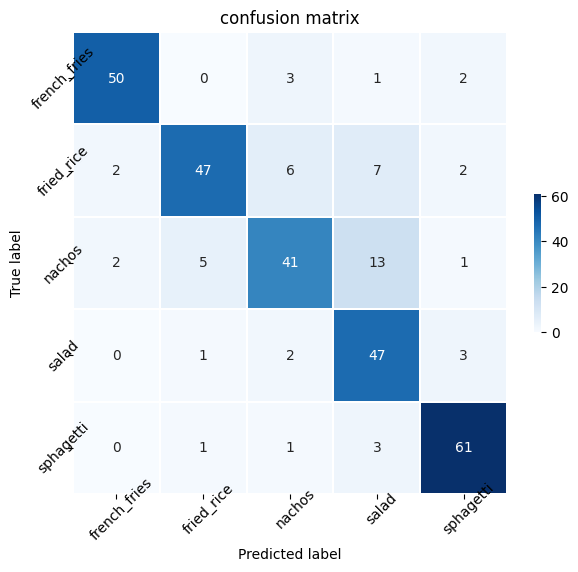

In [21]:
y_preds = resnet_model.predict(x_test)
y_preds = np.argmax(y_preds, axis=1)
y_trues = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_trues, y_preds)

fig, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'shrink': .3}, linewidths=.1, ax=ax)

ax.set(
    xticklabels=list(label_to_class.keys()),
    yticklabels=list(label_to_class.keys()),
    title='confusion matrix',
    ylabel='True label',
    xlabel='Predicted label'
)
params = dict(rotation=45, ha='center', rotation_mode='anchor')
plt.setp(ax.get_yticklabels(), **params)
plt.setp(ax.get_xticklabels(), **params)
plt.show()

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_trues, y_preds, digits = 5))
print('french_fries = 0, fried_rice = 1, nachos = 2, salad = 3, sphagetti = 4')

              precision    recall  f1-score   support

           0    0.92593   0.89286   0.90909        56
           1    0.87037   0.73438   0.79661        64
           2    0.77358   0.66129   0.71304        62
           3    0.66197   0.88679   0.75806        53
           4    0.88406   0.92424   0.90370        66

    accuracy                        0.81728       301
   macro avg    0.82318   0.81991   0.81610       301
weighted avg    0.82708   0.81728   0.81702       301

french_fries = 0, fried_rice = 1, nachos = 2, salad = 3, sphagetti = 4


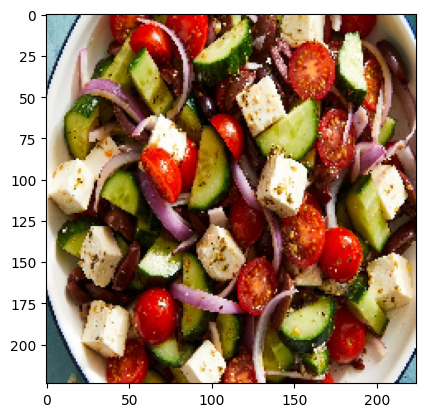

(1, 224, 224, 3)
1/1 [==============================] - 1s 569ms/step
softmax score:
[[4.6731465e-08 2.3290513e-05 6.7343033e-05 9.9990928e-01 1.0306661e-08]]
Class: 
3


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
import cv2
from tensorflow.keras.preprocessing import image

img_path = '/content/drive/MyDrive/Classify Culinary items using Deep Learning/salad.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

X = image.img_to_array(img)
X = np.expand_dims(X,axis = 0)
#images = np.vstack([X])
softmax_score = resnet_model.predict(X)
print("softmax score:")
print(softmax_score)
print("Class: ")
val = softmax_score.argmax()
print(val)